In [1]:
#importing the necessary libraries
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# Business Questions and Understanding
For this dataset I will be analysing the Seattle Airbnb Open Data. 

I will target these questions below:

Question 1: What prices are most common on Airbnb (top 10)

Question 2: Does the amount of bedrooms affect the price on Airbnb? does the amount of bathrooms?

Question 3: In what neighbourhood do the Airbnb places get the best ratings?

In [2]:
calender = pd.read_csv('calendar.csv')
calender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
reviews = pd.read_csv('reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [4]:
# this looks like the most important dataframe
df = pd.read_csv('listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [6]:
df.columns # here i am printing the columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [7]:
pd.set_option('display.max_rows', 500) #this just allows all of the rows to be shown

In [8]:
pd.set_option('display.max_columns', 500) #this just allows all of the columns to be shown

In [9]:
pd.set_option('display.width', 1000) #this just increases the width

In [10]:
df.dtypes #here i am checking the types if they are numeric or strings etc.

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

# Question 1: What prices are most common on Airbnb (top 10)

In [11]:
# here i am answering the first question on price
df.price.value_counts()

$150.00      162
$100.00      159
$75.00       118
$99.00       110
$95.00       110
$90.00       107
$125.00      105
$85.00       104
$65.00       104
$80.00        96
$110.00       86
$70.00        80
$55.00        76
$200.00       74
$120.00       74
$175.00       73
$60.00        72
$50.00        70
$115.00       64
$250.00       64
$69.00        59
$40.00        51
$105.00       50
$79.00        46
$129.00       44
$89.00        40
$135.00       40
$130.00       36
$45.00        35
$49.00        34
$59.00        34
$225.00       32
$139.00       32
$149.00       31
$109.00       31
$350.00       30
$300.00       29
$140.00       29
$145.00       28
$119.00       28
$195.00       28
$165.00       27
$160.00       25
$35.00        24
$39.00        22
$68.00        22
$275.00       21
$199.00       21
$180.00       18
$155.00       17
$42.00        17
$98.00        16
$97.00        15
$88.00        15
$58.00        15
$78.00        15
$170.00       15
$400.00       14
$82.00        

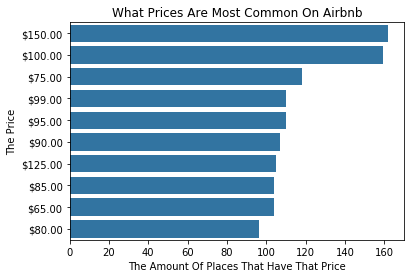

In [12]:
price_order = df.price.value_counts().iloc[:10].index #limits to top 10
base_color = sns.color_palette()[0]
sns.countplot(data = df, y = 'price', color = base_color, order = price_order)
plt.xlabel('The Amount Of Places That Have That Price');
plt.ylabel('The Price');
plt.title('What Prices Are Most Common On Airbnb');

Looking at the graph above, I can see that the most common price for a house or apartment to be on Airbnb is 150 dollars with a total amount of 162 people renting out their places for such a price on Airbnb. Then, the next most used price/popular price is 100 dollars with a total amount of 159 people renting out their places at such a price. Tied in fourth place are the prices 99 dollars and 95 dollars with a total amount of 110 individuals renting their places at such a price on Airbnb. Last but not least, the tenth most popular or used price on Airbnb is 80$ with a total amount of 96 individuals renting out their places at such a price.

# Question 2: Does the amount of bedrooms affect the price on Airbnb? does the amount of bathrooms?

In [13]:
df.groupby(['bedrooms']).mean() #here i am just trying to understand the bedrooms data better

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
bedrooms,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,6.364327e+06,2.016010e+13,1.855152e+07,4.824798,4.824798,47.624529,-122.332296,2.500000,0.994624,1.260753,575.000000,1.317204,1.744624,742.408602,14.701613,33.405914,53.524194,226.341398,21.809140,94.006515,9.592834,9.599349,9.762215,9.781759,9.644951,9.394137,NaN,3.540323,2.846602
1.0,5.527615e+06,2.016010e+13,1.617106e+07,5.029387,5.029387,47.628897,-122.331617,2.473314,1.097754,1.264073,673.085106,1.359537,2.371535,801.219280,17.885395,39.030616,61.570542,253.127844,25.402979,94.589170,9.654691,9.550573,9.785928,9.814833,9.611858,9.477828,NaN,3.041374,2.227110
2.0,5.345319e+06,2.016010e+13,1.382846e+07,16.018750,16.018750,47.629407,-122.336056,4.851562,1.419152,2.489063,1007.884615,2.106250,2.490625,759.353125,16.009375,35.064062,55.014063,239.746875,16.551562,94.478424,9.602637,9.562852,9.792844,9.806754,9.608286,9.371698,NaN,2.425000,1.609498
3.0,5.179498e+06,2.016010e+13,1.359733e+07,9.010601,9.010601,47.633810,-122.341131,6.501767,2.070671,3.452297,987.916667,2.954064,2.886926,717.946996,13.314488,29.501767,46.653710,221.745583,12.696113,94.673729,9.610169,9.529661,9.817797,9.809322,9.533898,9.466102,NaN,2.844523,1.241667
4.0,5.872371e+06,2.016010e+13,1.760999e+07,2.333333,2.333333,47.632652,-122.328010,8.275362,2.623188,4.623188,1501.500000,4.057971,2.217391,767.188406,11.014493,23.608696,36.202899,181.246377,8.246377,94.923077,9.692308,9.557692,9.769231,9.807692,9.634615,9.557692,NaN,2.014493,1.105962
5.0,5.885552e+06,2.016010e+13,1.223382e+07,5.458333,5.458333,47.623842,-122.335253,10.416667,3.312500,5.958333,3000.000000,3.541667,2.875000,833.541667,15.541667,34.750000,55.041667,251.583333,8.541667,95.000000,9.529412,9.470588,9.588235,9.705882,9.352941,9.294118,NaN,2.166667,0.844444
6.0,2.784489e+06,2.016010e+13,1.196666e+07,2.666667,2.666667,47.645377,-122.328983,13.333333,3.166667,8.666667,2600.000000,7.833333,3.333333,402.333333,13.000000,30.000000,48.500000,247.333333,13.666667,98.000000,9.500000,10.000000,10.000000,9.833333,9.833333,9.666667,NaN,2.333333,1.036667
7.0,5.022572e+06,2.016010e+13,5.343050e+05,2.000000,2.000000,47.673057,-122.351639,16.000000,4.000000,10.000000,NaN,6.000000,4.000000,60.000000,10.000000,38.000000,55.000000,310.000000,5.000000,100.000000,9.000000,9.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,0.790000


In [14]:
df.price = df[df.columns[57]].replace('[\$,]', '', regex=True).astype(float, inplace = True) #here the reason why i had to write 57 is because 
#price is that row (price is the 58th row)
# for the price I have to change the object to a float format. As the price has a dollar in front of it, I must remove
#this dollar sign first
#i had to do inplace = True so that it actually changed the price data


In [15]:
df['price'] = df.price.astype(float, inplace=True) #here i am changing the price object dytpe to a float format.

In [16]:
df.info() #checking to see if price is now a float item.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [17]:
df.groupby(['bedrooms']).mean()['price'] #now the groupby function finally works.

bedrooms
0.0    103.548387
1.0     95.706247
2.0    174.062500
3.0    249.530035
4.0    313.695652
5.0    441.000000
6.0    578.166667
7.0    375.000000
Name: price, dtype: float64

In [18]:
df.groupby(['bathrooms']).mean()['price'] #now the groupby function finally works.

bathrooms
0.0     80.375000
0.5     73.354839
1.0    106.685982
1.5    130.060484
2.0    191.737265
2.5    256.677419
3.0    275.453125
3.5    306.964912
4.0    463.750000
4.5    496.666667
5.0    135.000000
8.0     70.000000
Name: price, dtype: float64

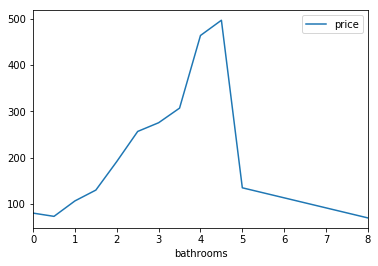

In [19]:
df.set_index('bathrooms', inplace=True)
df.groupby(['bathrooms']).mean()['price'].plot(legend=True)

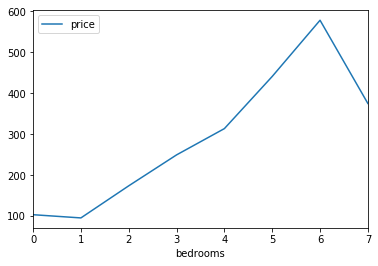

In [20]:
df.set_index('bedrooms', inplace=True);
df.groupby(['bedrooms']).mean()['price'].plot(legend=True);

Looking at the two graphs above, it is clear that the amount of bedrooms and/or bathrooms definetly does affect the price of the place. This is because on average a house or apartment that has one bedroom and bathroom rents out for about 100 dollars or so. As the amounts of bedrooms and bathrooms increases though, the price does to (as the line increases). According to the graph above, the highest point on that graph is for 4.5 bathrooms as the price of renting that house/appartment is a massive 196$. This doesn't really make sense due to the fact that there can't really be 4 and a half bathrooms but only either 4 or 5 but nothing in between. This shows how when we use the groupby function, this causes the data to lose a little bit of accuracy due to the fact that we are now using the means and not the exact values. 

# Question 3: In what neighbourhood do the Airbnb places get the best ratings?

In [21]:
df['country'].value_counts() #my original question was in what countries do the Airbnb places get the best ratings but 
#i just realized that all of the places are located in the US.

United States    3818
Name: country, dtype: int64

In [22]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
     

In [23]:
df['neighbourhood'].value_counts()

Capitol Hill                 351
Ballard                      213
Belltown                     204
Minor                        192
Queen Anne                   187
Fremont                      148
Wallingford                  143
University District          107
First Hill                   105
Stevens                       98
North Beacon Hill             95
Lower Queen Anne              83
Central Business District     81
Greenwood                     79
Columbia City                 61
Ravenna                       59
Phinney Ridge                 56
Magnolia                      55
Green Lake                    52
Atlantic                      50
North Admiral                 48
Mount Baker                   46
Leschi                        44
Eastlake                      41
Maple Leaf                    41
Madrona                       40
Pike Place Market             39
The Junction                  36
Seward Park                   32
Bryant                        32
Genesee   

In [24]:
df.review_scores_rating.value_counts()

100.0    781
98.0     292
96.0     278
97.0     266
95.0     260
94.0     198
93.0     184
99.0     146
90.0     138
80.0     111
92.0     105
91.0      97
87.0      55
89.0      53
88.0      47
85.0      24
84.0      23
86.0      17
83.0      13
60.0      12
82.0      10
70.0       8
73.0       7
76.0       5
72.0       4
78.0       4
77.0       4
40.0       4
75.0       3
71.0       3
81.0       3
68.0       2
74.0       2
67.0       2
79.0       2
66.0       2
64.0       1
20.0       1
53.0       1
65.0       1
55.0       1
57.0       1
Name: review_scores_rating, dtype: int64

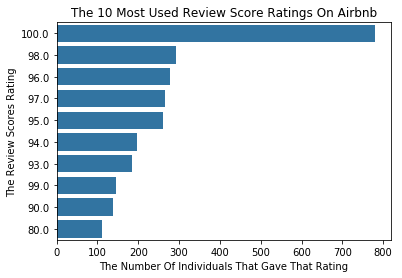

In [28]:
review_order = df.review_scores_rating.value_counts().iloc[:10].index #limits to top 10
base_color = sns.color_palette()[0]
sns.countplot(data = df, y = 'review_scores_rating', color = base_color, order = review_order)
plt.xlabel('The Number Of Individuals That Gave That Rating');
plt.ylabel('The Review Scores Rating');
plt.title('The 10 Most Used Review Score Ratings On Airbnb');

I created this graph to sow the rating scores that most people give on Airbnb. Looking above it is clear that the most people review their airbnb house and give it a massive rating of 100 points (a total amount of 781 individuals giving such a high rating. The 10th most used rating is 80 points with a total amount of 111 individuals rating the house or apartment with just a number. 

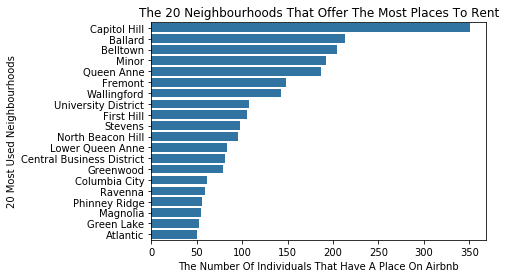

In [32]:
neighbourhood_order = df.neighbourhood.value_counts().iloc[:20].index
base_color = sns.color_palette()[0]
sns.countplot(data = df, y = 'neighbourhood', color = base_color, order = neighbourhood_order)
plt.xlabel('The Number Of Individuals That Have A Place On Airbnb');
plt.ylabel('20 Most Used Neighbourhoods');
plt.title('The 20 Neighbourhoods That Offer The Most Places To Rent');

Looking at the graph above you can see the 20 most used neighbourhoods (with used I mean the neighbourhoods that offer the most places to rent) the neighbourhood that has the most with a total amount of 351 houses and apartments to rent in is Capitol Hill. The neighbourhood that has the least is Atlantic with a total amount of 50 individuals who are renting our their houses.

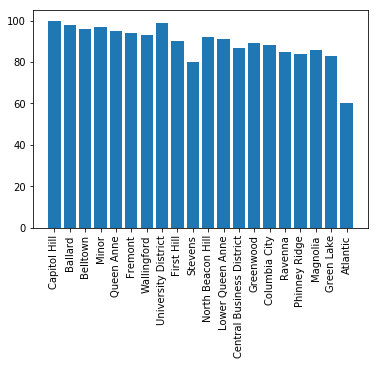

In [27]:
y = df.review_scores_rating.value_counts().iloc[:20].index #limits to top 10
x_name = df.neighbourhood.value_counts().iloc[:20].index #limits to top 10
x = np.arange(len(x_name))  # <--
plt.bar(x, y)
plt.xticks(x, x_name, rotation=90)  # <--
plt.show()

Lastly I looked at the average ratings per neighbourhood, the neighbourhoods being the top 20 neighbourhoods (the 20 neighbourhoods that offer the most places out for people to rent). Something that I find quite surprising is the fact that the Neighbourhood that has always gotten 100% rating is also the Neighbourhood that offers the most places to rent. 